In [1]:
import os
import pickle
import StaticWindow as sw

import numpy as np

import matplotlib.pyplot as plt

# Load Data

In [2]:
directory = 'INSERT DIRECTORY' # Directory where events generated by Simulation.py are saved.

file = 'INSERT FILENAME' # Simulation Filename for Example SNR.

raw_traces, ground_truths = sw.load_SNR_data(directory, [file])

0


# Calculate Moving Average Values

In [17]:
test = sw.calculate_means(raw_traces[2.0] * 1000, 100, 10)
test.shape

(10, 99991)

# Plot Moving Average Distribution with Events

In [21]:
counts, bin_edges = np.histogram(test.flatten(), bins=100)
bin_mids = bin_edges[:-1] + (np.diff(bin_edges) / 2)

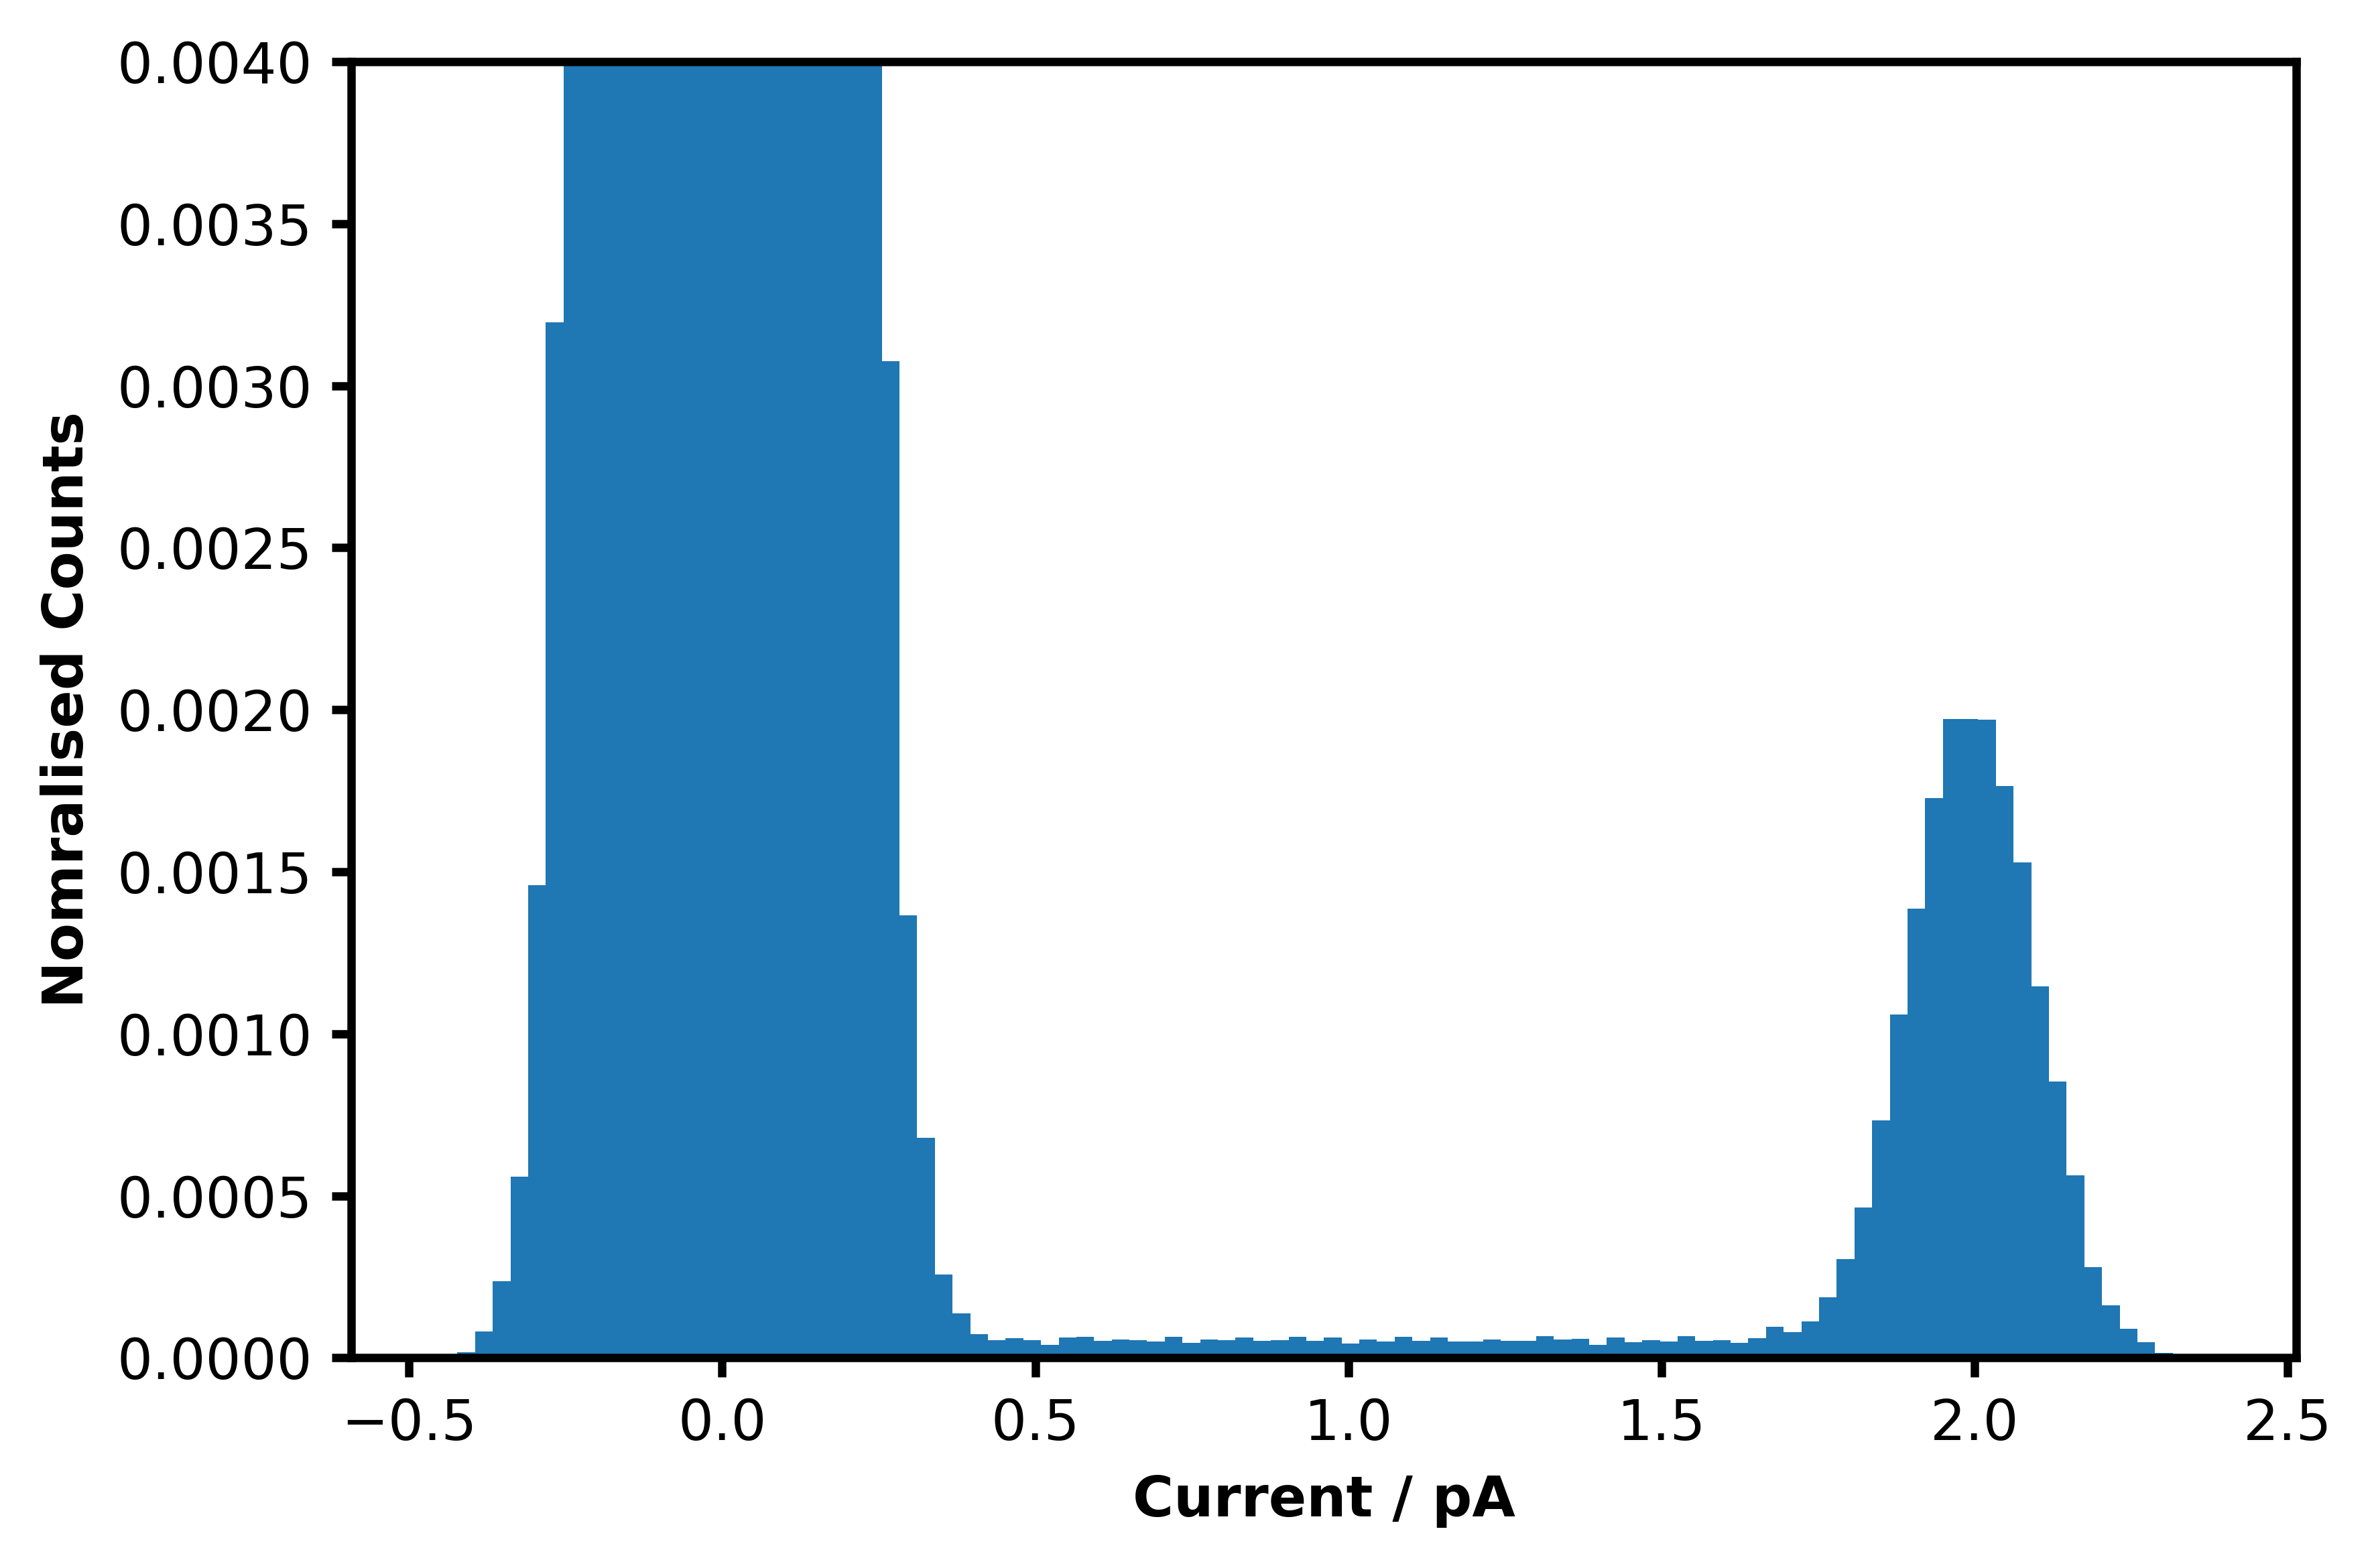

In [22]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=600)
ax.bar(bin_mids, counts / sum(counts), width=np.diff(bin_edges))

ax.set_xlabel("Current / pA", weight='bold')
ax.set_ylabel("Nomralised Counts", weight='bold')

ax.tick_params(width=1.5)
for axis in ['top', 'right', 'bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    
ax.set(ylim=(0, 0.004))

fig.tight_layout()

fig.savefig('Avg Events.png')

# Plot Comparison of Raw Trace vs Moving Average Trace

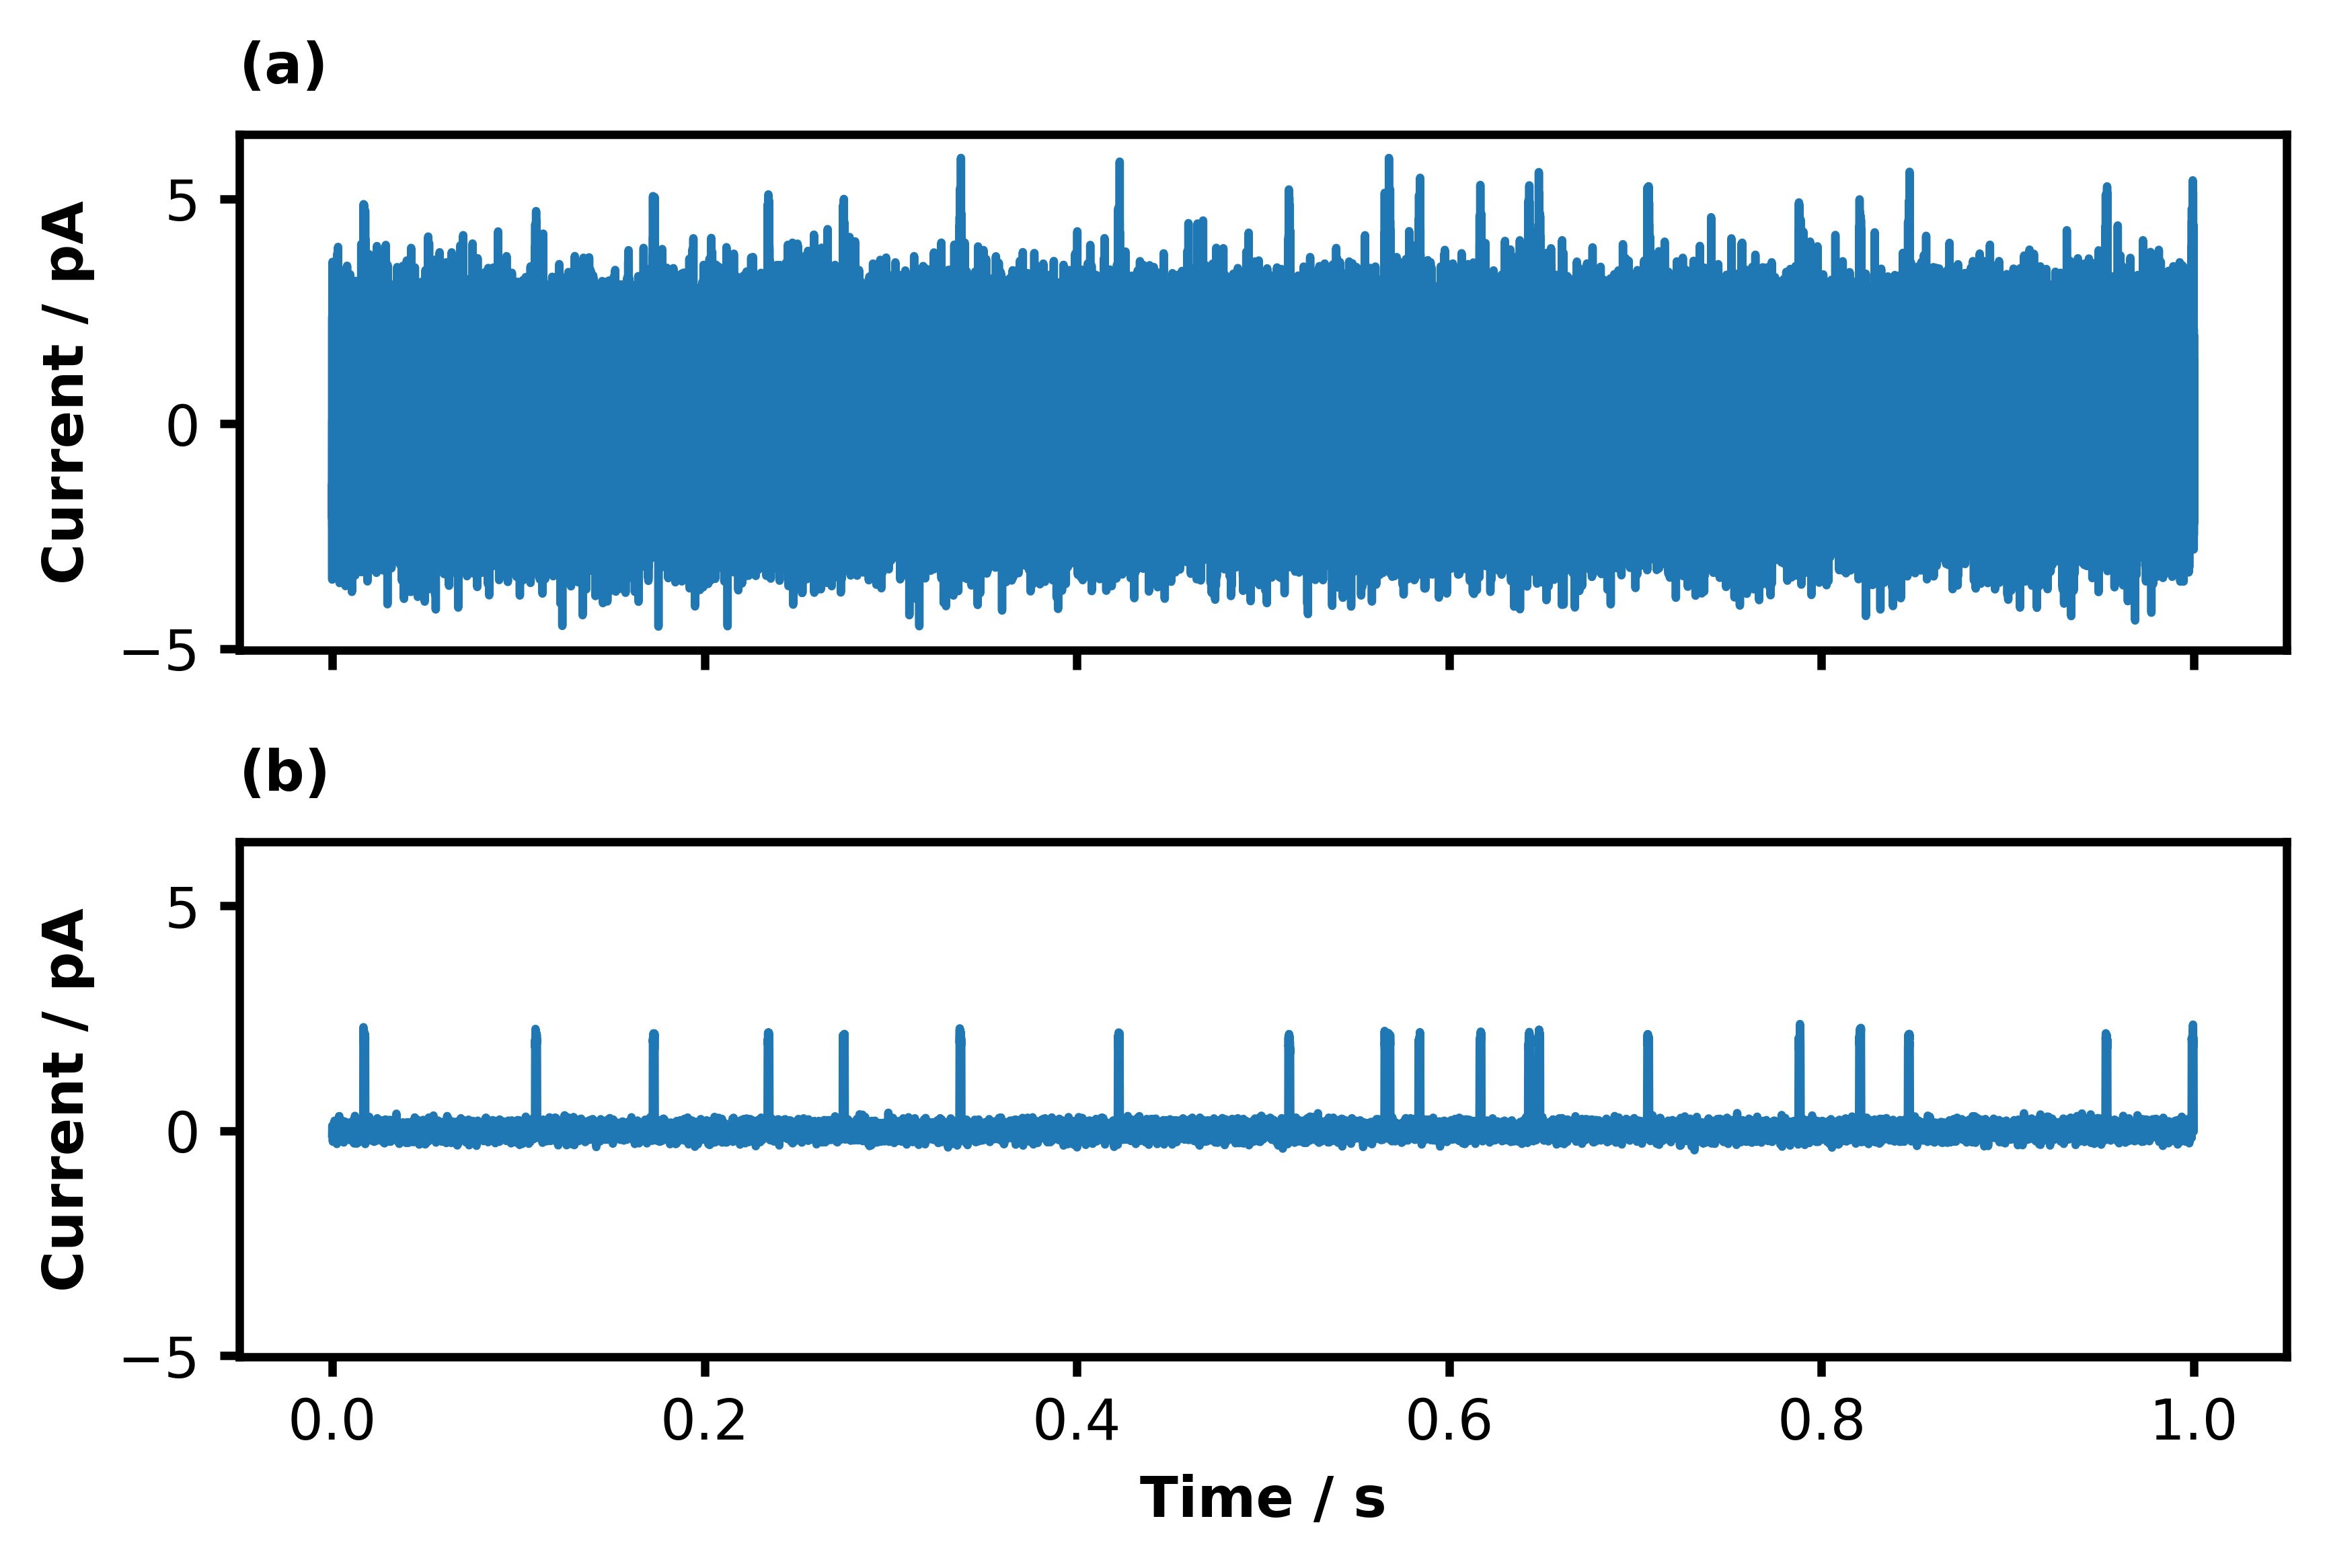

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(6, 4), dpi=600, sharex=True, sharey=True)

y = raw_traces[2.0][0, :] * 1000
x = np.linspace(0, len(y), len(y)) / 1000000

axs[0].plot(x, y)
axs[1].plot(x[:-99:10], test[0, :])

axs[1].set_xlabel('Time / s', weight='bold')

axs[0].set_ylabel("Current / pA", weight='bold')
axs[1].set_ylabel("Current / pA", weight='bold')

axs[0].tick_params(width=1.5)
axs[1].tick_params(width=1.5)
for axis in ['top', 'right', 'bottom', 'left']:
    axs[0].spines[axis].set_linewidth(1.5)
    axs[1].spines[axis].set_linewidth(1.5)
    
axs[0].annotate('(a)', xy=(0, 1.1), xycoords='axes fraction', weight='bold')
axs[1].annotate('(b)', xy=(0, 1.1), xycoords='axes fraction', weight='bold')
    
fig.tight_layout()

fig.savefig('Avg trace.png')